<a href="https://colab.research.google.com/github/Marvin9516008/Lab3/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/trainlab3.csv'
dataset = pd.read_csv(data_path)
dataset.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
dataset.date = pd.to_datetime(dataset.date)

In [6]:
dataset = dataset.set_index("date")
dataset.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


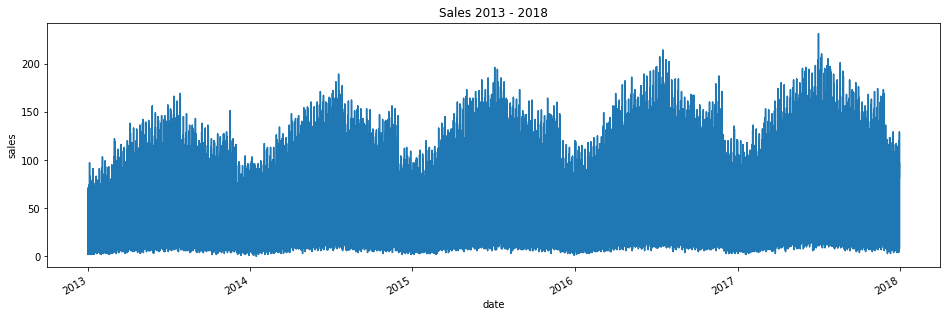

In [10]:
ax = dataset['sales'].plot(figsize = (16,5), title = "Sales 2013 - 2018")
ax.set(xlabel='date', ylabel='sales');

In [8]:
df = pd.DataFrame(dataset)

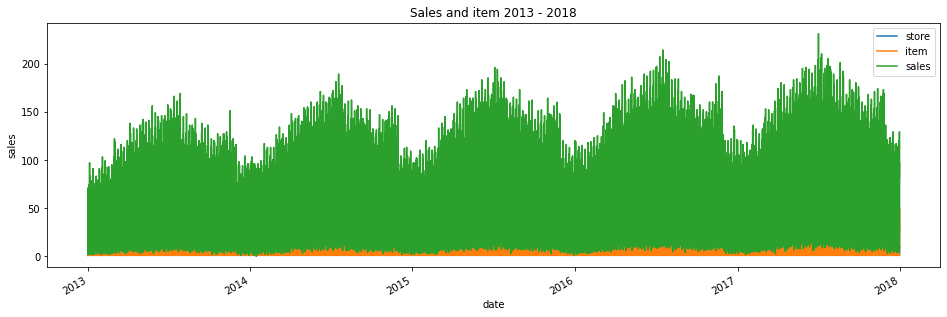

In [11]:
ax = df.plot(figsize = (16,5), title = "Sales and item 2013 - 2018")
ax.set(xlabel='date', ylabel='sales');

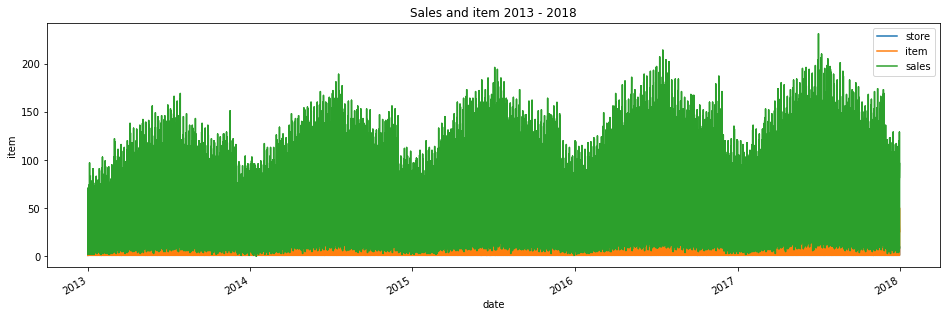

In [12]:
ax = df.plot(figsize = (16,5), title = "Sales and item 2013 - 2018")
ax.set(xlabel='date', ylabel='item');